# Project FIFA

## Hypothesis testing with "Men's" and Women's Football Matches

### Summary
Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the *mean number of goals scored in women's international soccer matches is the same as men's*. Use a **10% significance level**.

For this analysis, you'll use Official `FIFA World Cup` matches since `2002-01-01`, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called `result_dict` in the form:

```result_dict = {"p_val": p_val, "result": result}```

where `p_val` is the `p-value` and `result` is either the string `"fail to reject"` or `"reject"`, depending on the result of the test.

### Introduction

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [2]:
file_XY='./men_results.csv'
df_XY=pd.read_csv(file_XY,index_col=0)
file_XX='./women_results.csv'
df_XX=pd.read_csv(file_XX,index_col=0)

### Exploratory on MEN (i.e. XY) file

In [3]:
df_XY.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
df_XY['date']=pd.to_datetime(df_XY['date'],format='%Y-%m-%d') # To transform the date into datetime

In [5]:
df_XY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.4+ MB


* No null values
* Scores in integers

In [6]:
df_XY.describe(include='all')

,date,home_team,away_team,home_score,away_score,tournament
count,44353,44353,44353,44353.000000,44353.000000,44353
unique,NaN,311,306,NaN,NaN,141
top,NaN,Brazil,Uruguay,NaN,NaN,Friendly
freq,NaN,594,560,NaN,NaN,17519
mean,1992-06-23 17:28:36.763240320,NaN,NaN,1.740559,1.178793,NaN
min,1872-11-30 00:00:00,NaN,NaN,0.000000,0.000000,NaN
25%,1979-05-13 00:00:00,NaN,NaN,1.000000,0.000000,NaN
50%,1999-03-11 00:00:00,NaN,NaN,1.000000,1.000000,NaN
75%,2011-03-25 00:00:00,NaN,NaN,2.000000,2.000000,NaN
max,2022-12-18 00:00:00,NaN,NaN,31.000000,21.000000,NaN


**NOTE: A further analysis may require:**
* **a full check of the team names (`'home_team'` and `'away_team'` columns) and**
* **tournament names, `'tournament'` column**

In [23]:
df_XY['tournament'].value_counts()[:5]

tournament
Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
Name: count, dtype: int64

The database should be filtered to:
* columnt `'turnament'` to 'FIFA World Cup' and
* `'date'` of year 2002 and above 

In [8]:
wc_xy=df_XY[(df_XY['tournament']=='FIFA World Cup')&(df_XY['date']>=dt.datetime(2002,1,1))].reset_index(drop=True)

* A new column of total goals is required by adding home and away scores.
* And analyse the distribution of the data using count plot.

In [9]:
wc_xy['total_goals']=wc_xy['home_score']+wc_xy['away_score']
wc_xy.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


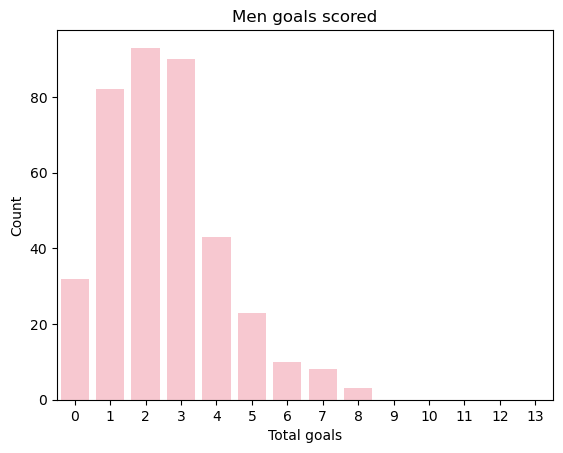

In [41]:
ax=sns.countplot(data=wc_xy,x='total_goals', color='pink')
ax.set(xlabel='Total goals', ylabel='Count',title='Men goals scored')
plt.show()

### Exploratory on WOMEN (i.e. XX) file

Similar exploratory analysis must be done for ***WOMEN*** i.e. XX

In [11]:
df_XX.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [12]:
df_XX['date']=pd.to_datetime(df_XX['date'],format='%Y-%m-%d')

In [13]:
df_XX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 267.1+ KB


In [14]:
df_XX.describe(include='all')

,date,home_team,away_team,home_score,away_score,tournament
count,4884,4884,4884,4884.000000,4884.000000,4884
unique,NaN,198,196,NaN,NaN,30
top,NaN,United States,Denmark,NaN,NaN,UEFA Euro qualification
freq,NaN,269,151,NaN,NaN,1445
mean,2007-08-17 22:29:11.351351296,NaN,NaN,2.272727,1.431409,NaN
min,1969-11-01 00:00:00,NaN,NaN,0.000000,0.000000,NaN
25%,2000-06-23 00:00:00,NaN,NaN,0.000000,0.000000,NaN
50%,2009-07-13 00:00:00,NaN,NaN,1.000000,1.000000,NaN
75%,2016-04-12 00:00:00,NaN,NaN,3.000000,2.000000,NaN
max,2022-07-31 00:00:00,NaN,NaN,24.000000,24.000000,NaN


In [15]:
df_XX['tournament'].value_counts()[:15]

tournament
UEFA Euro qualification               1445
Algarve Cup                            551
FIFA World Cup                         284
AFC Championship                       268
Cyprus Cup                             258
African Championship qualification     226
UEFA Euro                              184
African Championship                   173
FIFA World Cup qualification           172
CONCACAF Gold Cup qualification        143
AFC Asian Cup qualification            141
Copa América                           131
Olympic Games                          130
CONCACAF Gold Cup                      126
Friendly                               111
Name: count, dtype: int64

In [16]:
wc_xx=df_XX[(df_XX['tournament']=='FIFA World Cup')&(df_XX['date']>=dt.datetime(2002,1,1))].reset_index(drop=True)

In [17]:
wc_xx['total_goals']=wc_xx['home_score']+wc_xx['away_score']
wc_xx.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1,2003-09-20,Norway,France,2,0,FIFA World Cup,2
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


In [18]:
wc_xx.shape

(200, 7)

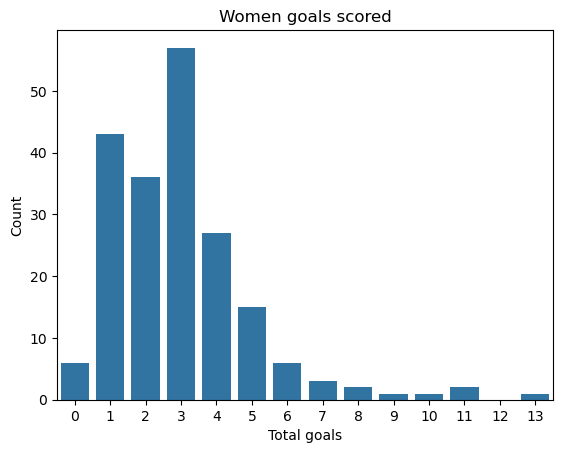

In [39]:
ax=sns.countplot(data=wc_xx,x='total_goals')
ax.set(xlabel='Total goals', ylabel='Count',title='Women goals scored')
plt.show()

### Plot comparing goals scored in the WC of football of MEN (XY) vs WOMEN (XX).

In [28]:
# Define the category range of total goals
goal_range = range(14)  # This will be from 0 to 13

# Convert 'total_goals' to a categorical type with the specified categories
wc_xy['total_goals'] = pd.Categorical(wc_xy['total_goals'], categories=goal_range, ordered=True)
wc_xx['total_goals'] = pd.Categorical(wc_xx['total_goals'], categories=goal_range, ordered=True)


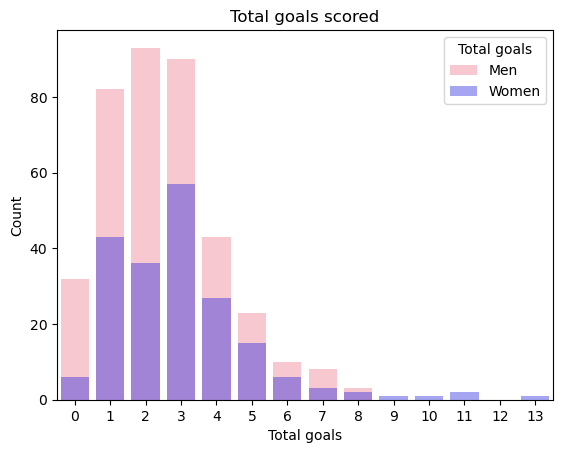

In [42]:
# Plotting the first countplot
ax=sns.countplot(data=wc_xy, x='total_goals', color='pink', label='Men')

# Plotting the second countplot with different color and transparency
sns.countplot(data=wc_xx, x='total_goals', color='blue', alpha=0.4, label='Women')

ax.set(xlabel='Total goals', ylabel='Count',title='Total goals scored')

# Adding the legend
plt.legend(title='Total goals')

# Showing the plot
plt.show()

### Chosing hypothesis.

* Two different groups.
    * Groups: XX, XY 
* Data is not paired and are independent.
* As requested $\alpha$ = 0.1
* It is unclear about the normality of the samples, therefore, a normality test is required.

#### Hypothesis:

Comming back to the requirements of the Project:
* mean number of goals scored in women's international soccer matches is the same as men's.
  
$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

*Mean(XX Total goals) = Mean(XY Total goals)*

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

*Mean(XX Total goals) **'greater'** Mean(XY Total goals)*

* Use a 10% significance level.
  
$\alpha$ = 0.1
* assume that each match is fully independent (**un-paired**)

unpaired=False

* The p-value and the result of the test must be stored in a dictionary called result_dict in the form:
* result_dict = {"p_val": p_val, "result": result}
* where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [34]:
# Parameters for the statistical test
alpha = 0.1  # Significance level
altern = 'greater'  # Alternative hypothesis type

# Perform the Mann-Whitney U test on 'total_goals' using Pingouin
test_results = pingouin.mwu(x=wc_xx['total_goals'].astype(int), 
                      y=wc_xy['total_goals'].astype(int), 
                      alternative=altern)

# Extract the p-value from the test results
p_val = float(test_results.loc['MWU', 'p-val'])

# Determine the result based on the p-value and significance level
if p_val < alpha:
    result = 'reject'  # Reject the null hypothesis
else:
    result = 'fail to reject'  # Fail to reject the null hypothesis

# Store and print the test results
result_dict = {"p_val": p_val, "result": result}
print(result_dict)


{'p_val': 0.005106609825443641, 'result': 'reject'}
